In [1]:
import nest
import pylab

In [2]:
neuron_A = nest.Create("iaf_psc_delta")

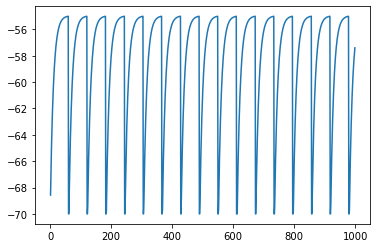

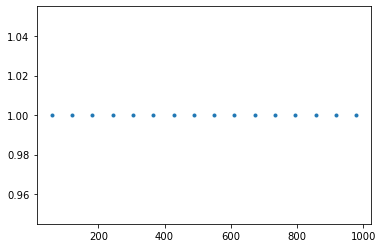

In [3]:
nest.SetStatus(neuron_A, {"I_e": 376.0})

multimeter_A = nest.Create("multimeter")
nest.SetStatus(multimeter_A, {"withtime": True, "record_from":["V_m"]})

spikedetector_A = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

nest.Connect(multimeter_A, neuron_A)
nest.Connect(neuron_A, spikedetector_A)

nest.Simulate(1000.0)

dmm = nest.GetStatus(multimeter_A)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

pylab.figure(1)
pylab.plot(ts, Vms)

dSD = nest.GetStatus(spikedetector_A,keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.figure(2)
pylab.plot(ts, evs, ".")
pylab.show()

In [4]:
neuron_B = nest.Create("iaf_psc_delta")

In [5]:
nest.SetStatus(neuron_B, {"I_e": 0.})

multimeter_B = nest.Create("multimeter")
nest.SetStatus(multimeter_B, {"withtime": True, "record_from":["V_m"]})

spikedetector_B = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

nest.Connect(multimeter_B, neuron_B)
nest.Connect(neuron_B, spikedetector_B)

nest.Simulate(1000.0)

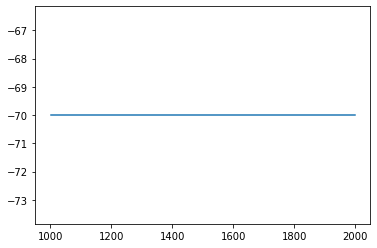

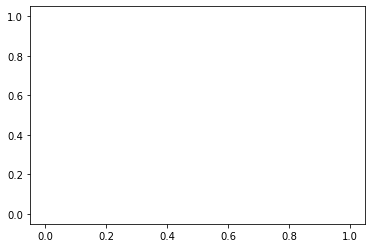

In [6]:
dmm = nest.GetStatus(multimeter_B)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

pylab.figure(1)
pylab.plot(ts, Vms)

dSD = nest.GetStatus(spikedetector_B,keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.figure(2)
pylab.plot(ts, evs, ".")
pylab.show()

In [7]:
nest.Connect(neuron_A, neuron_B)
nest.Simulate(1000.0)

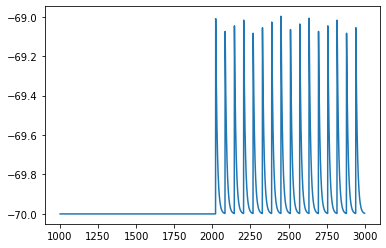

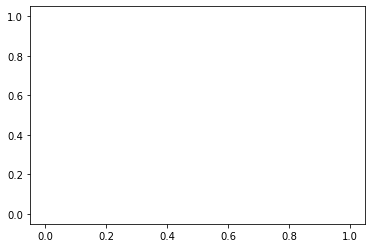

In [8]:
dmm = nest.GetStatus(multimeter_B)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

pylab.figure(1)
pylab.plot(ts, Vms)

dSD = nest.GetStatus(spikedetector_B,keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.figure(2)
pylab.plot(ts, evs, ".")
pylab.show()